FRIDAY SALES

In [12]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from  matplotlib import pyplot as plt

df=pd.read_csv("BlackFriday.csv")
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


Analysing Column

In [14]:


for i in df:
     print("No. of unique element in " +i+" is " + str(df[i].nunique()))

No. of unique element in User_ID is 5891
No. of unique element in Product_ID is 3623
No. of unique element in Gender is 2
No. of unique element in Age is 7
No. of unique element in Occupation is 21
No. of unique element in City_Category is 3
No. of unique element in Stay_In_Current_City_Years is 5
No. of unique element in Marital_Status is 2
No. of unique element in Product_Category_1 is 18
No. of unique element in Product_Category_2 is 17
No. of unique element in Product_Category_3 is 15
No. of unique element in Purchase is 17959


In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

Removing Product_Category 1 and 2 as the have large number of NaN values

In [16]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


3-Analyze the gender distribution of the customers and examine if there are any purchasing trends based on gender.


([<matplotlib.patches.Wedge at 0x264dc88d700>,
 [Text(0.7877407630244033, 0.7677659085097038, 'F'),
  Text(-0.7877407270826864, -0.7677659453865094, 'M')],
 [Text(0.42967677983149266, 0.41878140464165664, '24.6%'),
  Text(-0.4296767602269198, -0.41878142475627783, '75.4%')])

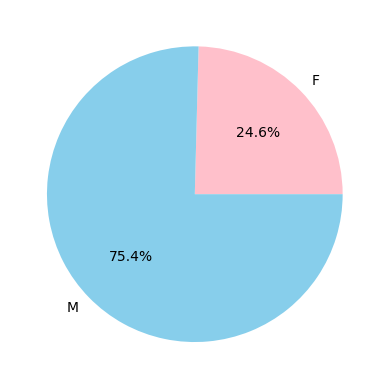

In [17]:
values=df.groupby("Gender").size()

values
plt.pie(values, colors=["pink", "skyblue"],labels=values.index,autopct ="%1.1f%%")


<Axes: ylabel='Ratio'>

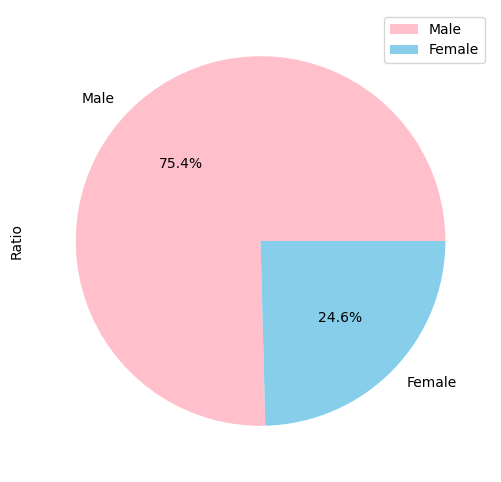

In [18]:
#Another Method

data=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data.plot.pie(y='Ratio',figsize=(6,6),autopct='%1.1f%%',colors=['Pink','skyblue'])

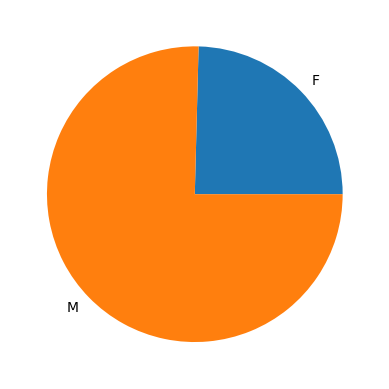

<Axes: xlabel='Gender'>

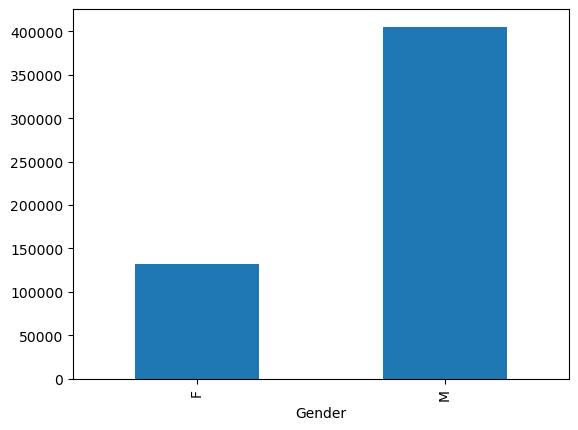

In [19]:
df.groupby("Gender").size().plot(kind="pie")
plt.show()
df.groupby("Gender").size().plot(kind="bar")

 4-Investigate how age groups and marital status affect purchasing behavior.

([<matplotlib.patches.Wedge at 0x264dc9a45c0>,
 [Text(-0.31087933967974596, 1.055155929784923, '0'),
  Text(0.3108793396797463, -1.055155929784923, '1')])

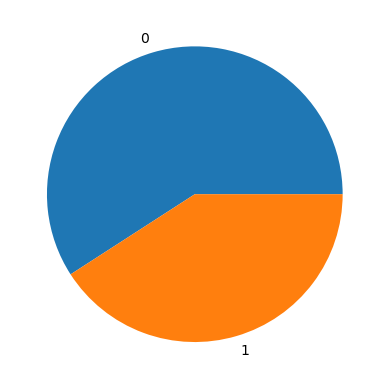

In [20]:
alpha=df.groupby("Marital_Status").size()
alpha
plt.pie(alpha, labels=alpha.index)

([<matplotlib.patches.Wedge at 0x264dc300140>,
 [Text(1.0959396646159807, 0.09442590492768436, '0-17'),
  Text(0.8104832985839837, 0.7437182414842501, '18-25'),
  Text(-0.9237638347602168, 0.5972104968845565, '26-35'),
  Text(-0.284740787068905, -1.0625077337033273, '36-45'),
  Text(0.6450291202246958, -0.891031668383428, '46-50'),
  Text(0.9836212696736539, -0.4924319220416049, '51-55'),
  Text(1.091802937436651, -0.13403859818985256, '55+')])

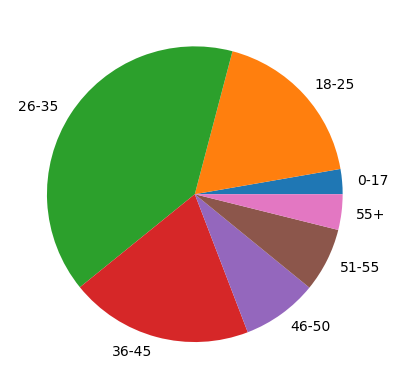

In [21]:
values=df.groupby("Age").size()
values
plt.pie(values, labels=values.index)

5-Combine multiple columns to analyze more complex relationships and derive insights from combinations of factors.

In [22]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


<Axes: xlabel='Age', ylabel='Purchase'>

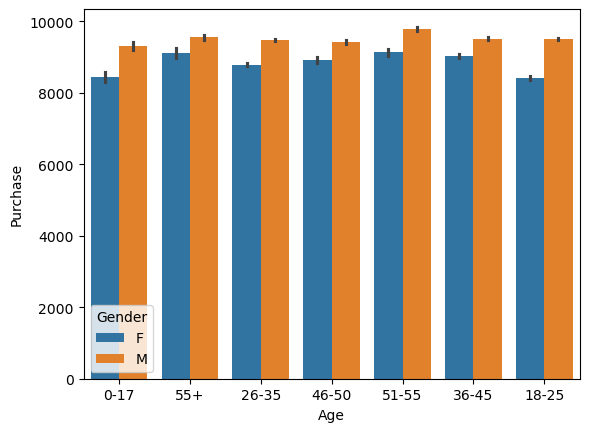

In [23]:
sns.barplot(x='Age',y='Purchase' , hue='Gender',data=df)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

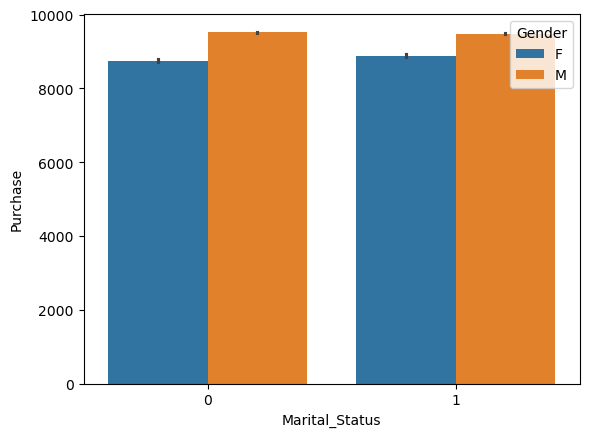

In [24]:
sns.barplot(x='Marital_Status',y='Purchase' , hue='Gender',data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

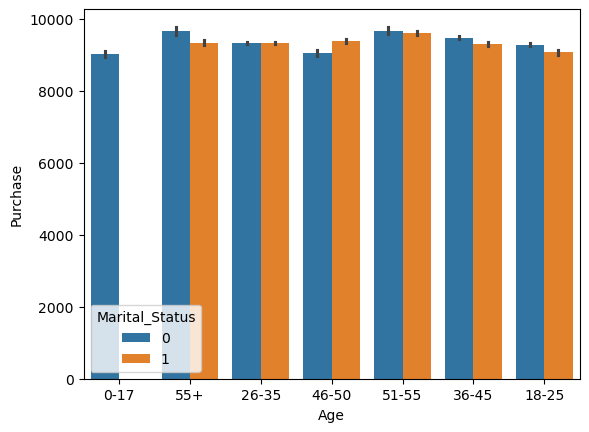

In [25]:
sns.barplot(x='Age',y='Purchase' , hue='Marital_Status',data=df)

In [26]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


Occupation and Products Analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

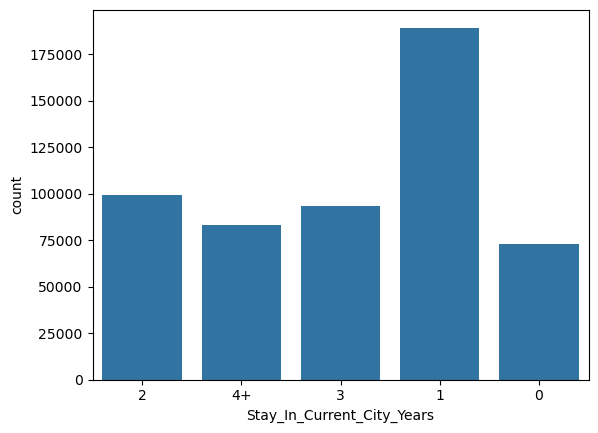

In [30]:
sns.countplot(x="Stay_In_Current_City_Years" , data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

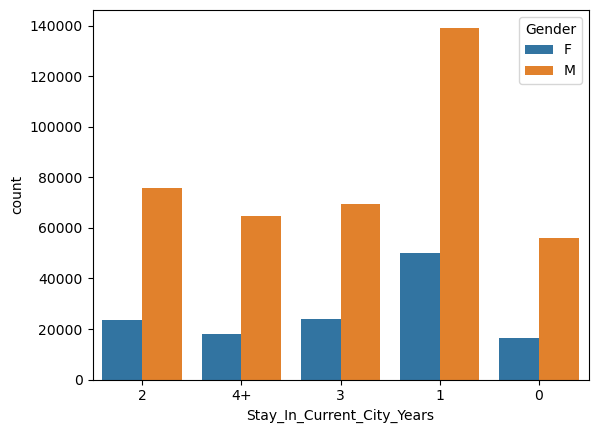

In [31]:
sns.countplot(x="Stay_In_Current_City_Years" , hue="Gender" , data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

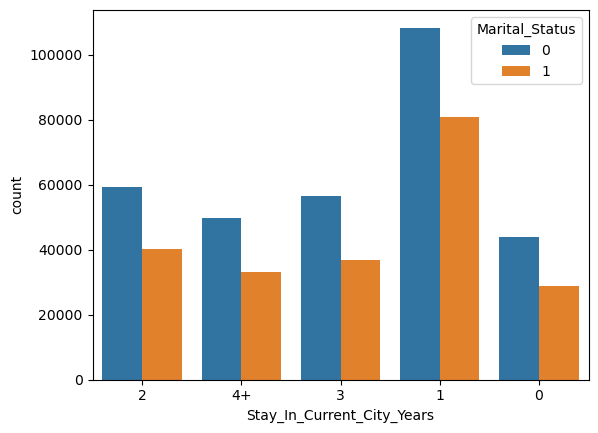

In [32]:
sns.countplot(x="Stay_In_Current_City_Years" , hue="Marital_Status" , data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

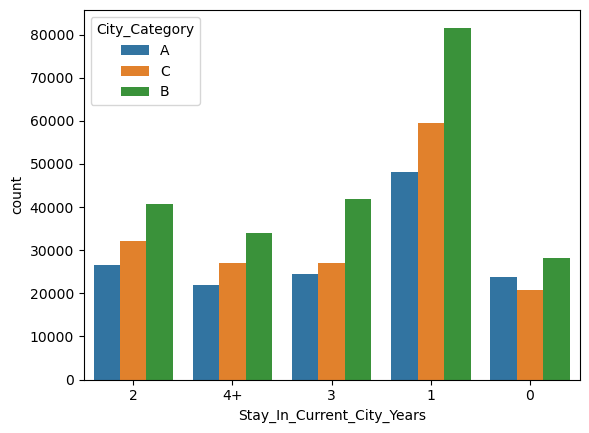

In [33]:
sns.countplot(x="Stay_In_Current_City_Years" , hue="City_Category" , data=df)

we should target Male and unmarried customer who are living in city B less than 1 yeas

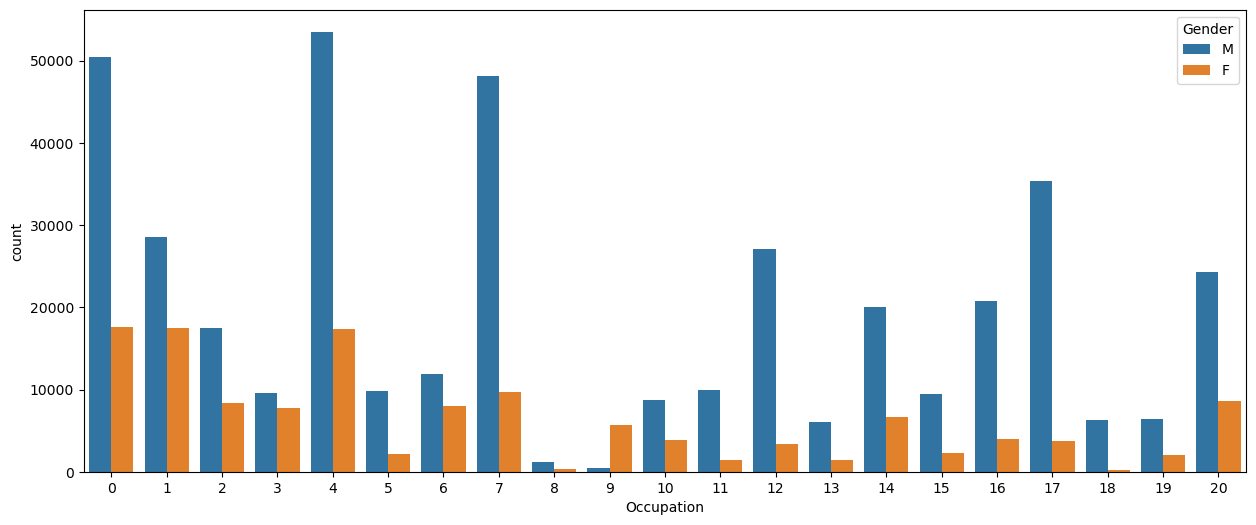

In [39]:
fig=plt.figure(figsize=(15,6))
fig=sns.countplot(x="Occupation" , hue="Gender" , data=df)

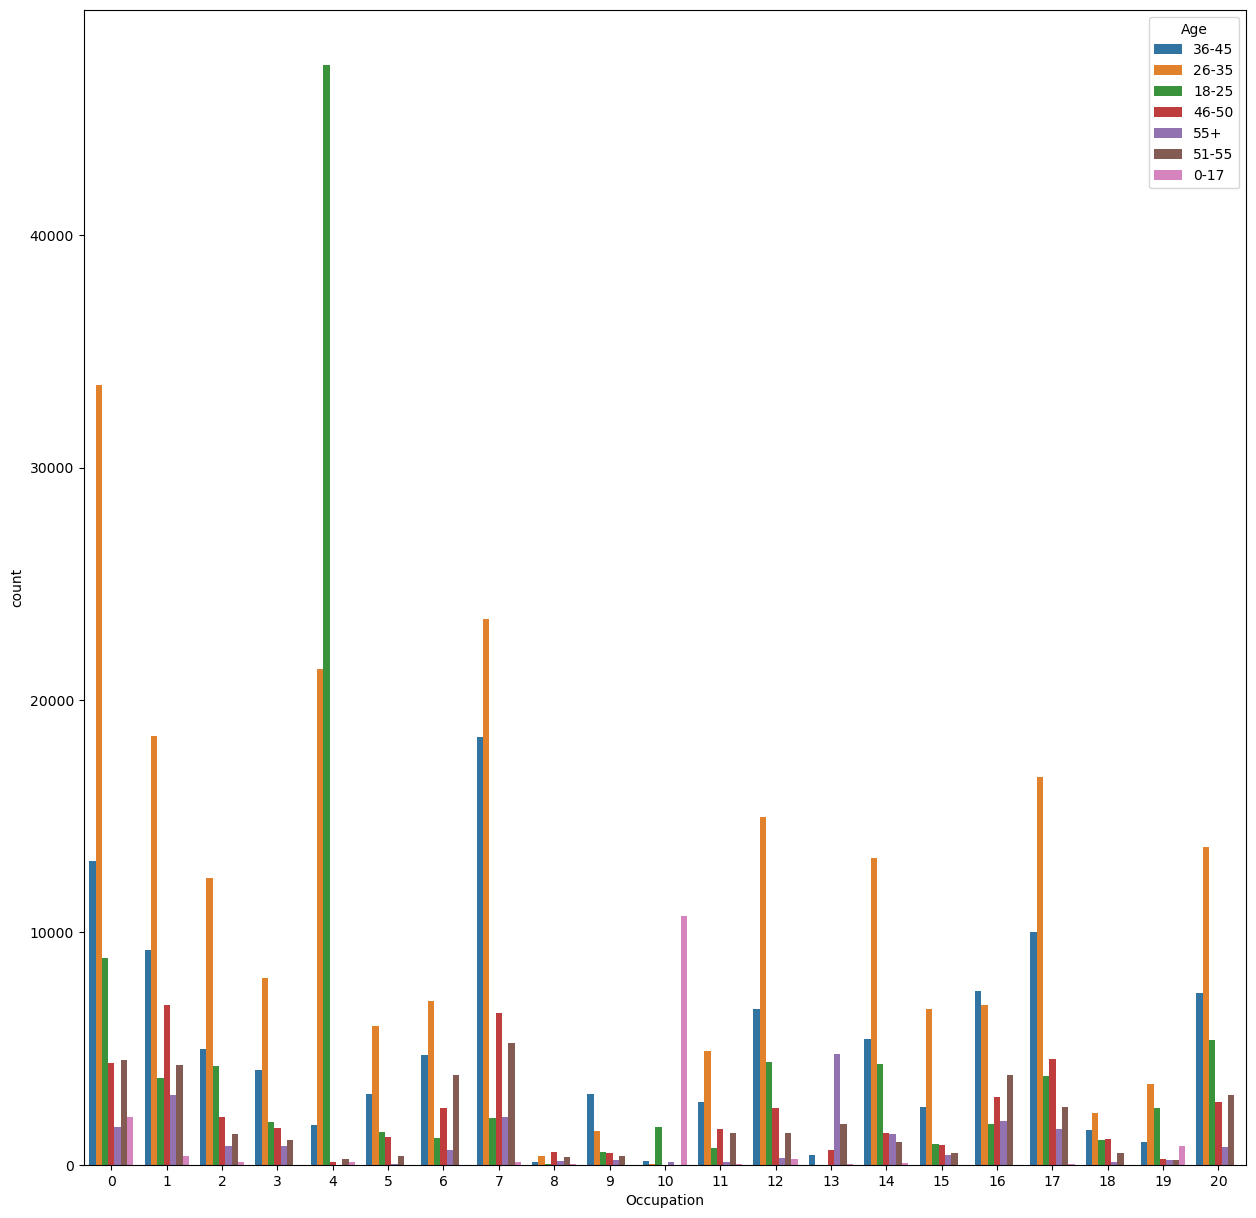

In [41]:
fig=plt.figure(figsize=(15,15))
fig=sns.countplot(x="Occupation" , hue="Age" , data=df)

<Axes: xlabel='Occupation'>

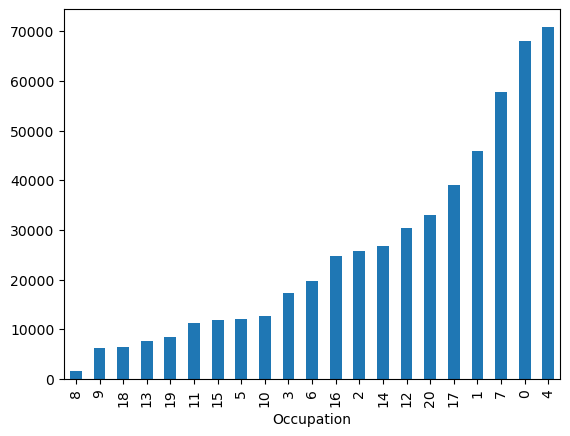

In [42]:
df.groupby("Occupation").size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

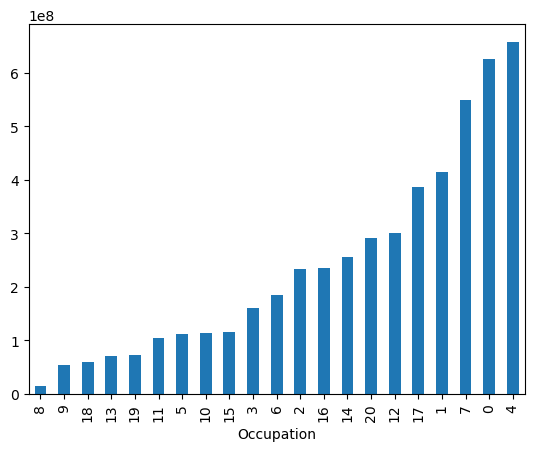

In [48]:
df.groupby("Occupation").sum()["Purchase"].sort_values().plot(kind='bar')

TypeError: agg function failed [how->mean,dtype->object]